# Designing a Regression Model for `Montreal Local TV Channels`

### This project is an evaluation task sent by YapAiTek. 
I use various libraries for this project. Including:

`pandas`: Used for data manipulation

`numpy`: Powerful library for numerical computation

`Matplotlic`: Useful in plotting and data visualisation

`Scikit-learn`: Powerful library with implementation most of the machine learning library and performance metric

`joblib`: for saving the trained model.


In [72]:
import pandas as pd
import numpy as np

In [73]:
# Opening the csv file and some basic analysis
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
Unnamed: 0                                616656 non-null int64
Episode                                   616656 non-null object
Station                                   616656 non-null object
Channel Type                              616656 non-null object
Season                                    616656 non-null object
Year                                      616656 non-null int64
Date                                      616656 non-null object
Day of week                               616656 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616656 non-null int64
Name of show                              616656 non-null object
Name of episode                           394077 non-null object
Genre                                     61665

# Data Cleaning and Feature Engineering

First of all we should rename the column labels and remove whitespaces and reduce length of labels

In [74]:
# dealing with column names
df.rename(columns={"Temperature in Montreal during episode": "Temperature",
                   "Game of the Canadiens during episode?": "Game_of_canadiains",
                   "# of episode in the season": "Multiple_episode",
                   "Name of episode": "Name_episode",
                   "Day of week": "Weekday",
                   "Channel Type": "Channel_type",
                   "First time or rerun": "First_time",
                   "Market Share_total": "Total_market_share",
                   "Movie?": "Movie"}, inplace=True)

In [75]:
df.head()

,Unnamed: 0,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name of show,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [76]:
# removing first column (unnamed: 0) which is not necessary
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name of show,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [77]:
# checking columns of `Episod` and `Name of show` values
equal_two_columns = df['Episode'].equals(df['Name of show'])

# Actually these 2 columns are exactly the same
if equal_two_columns: # True
    df.drop(columns=['Name of show'], inplace=True)
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,NaN,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [78]:
# handling "Name of episode" column
different_categories = len(df['Episode'].unique()) # different categories is very large. not possible to use one-hot encoding.

# filling null values
df['Name_episode'] = df.apply(
    lambda row: row['Episode'] if pd.isnull(row['Name_episode']) else row['Name_episode'],
    axis=1
)
df.head()


,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18.250


In [79]:
# Handling null values in Start/End_time
# Very few records have null values in `Start_time` and `End_time`. we remove them.
df = df.dropna(subset=['Start_time', 'End_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 18 columns):
Episode               616613 non-null object
Station               616613 non-null object
Channel_type          616613 non-null object
Season                616613 non-null object
Year                  616613 non-null int64
Date                  616613 non-null object
Weekday               616613 non-null object
Start_time            616613 non-null object
End_time              616613 non-null object
Length                616613 non-null int64
Name_episode          616613 non-null object
Genre                 616613 non-null object
First_time            616613 non-null object
Multiple_episode      616613 non-null object
Movie                 616613 non-null object
Game_of_canadiains    616613 non-null object
Total_market_share    616613 non-null float64
Temperature           533312 non-null float64
dtypes: float64(2), int64(2), object(14)
memory usage: 89.4+ MB


In [80]:
# Handling and cleanning temperature column. 
# becuase rows are sorted with Start_time in one station we can use interpolation to fill nulls. 
df['Temperature'].interpolate(inplace=True)
df.Temperature = df.Temperature.astype(int)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 18 columns):
Episode               616613 non-null object
Station               616613 non-null object
Channel_type          616613 non-null object
Season                616613 non-null object
Year                  616613 non-null int64
Date                  616613 non-null object
Weekday               616613 non-null object
Start_time            616613 non-null object
End_time              616613 non-null object
Length                616613 non-null int64
Name_episode          616613 non-null object
Genre                 616613 non-null object
First_time            616613 non-null object
Multiple_episode      616613 non-null object
Movie                 616613 non-null object
Game_of_canadiains    616613 non-null object
Total_market_share    616613 non-null float64
Temperature           616613 non-null int32
dtypes: float64(1), int32(1), int64(2), object(14)
memory usage: 87.0+ MB


In [82]:
df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,End_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",News,No,Yes,No,No,1.7,18
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18


In [83]:
# handling date and time features
# By analysing the dataset it was realized that `length` column show each 15 minutes of the episode.
# We can compute exact length of episode with `Start_time` and `End_time` as minute
# So `End_time` is redundant maybe and it can be removed

# we could simply multiply `length` to 15. But some episodes that have length less than 15 are set to 0 in `Length` column.

df['Start_time'] = pd.to_timedelta(pd.to_datetime(df['Start_time']))
df['End_time'] = pd.to_timedelta(pd.to_datetime(df['End_time']))

df['Length'] = df.apply(
    lambda row: (row.End_time.total_seconds() - row.Start_time.total_seconds()) / 60,
    axis=1
)
df.Length = df.Length.astype(int)

df.drop(['End_time'], inplace=True, axis=1)

df.head()

,Episode,Station,Channel_type,Season,Year,Date,Weekday,Start_time,Length,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 06:00:00,120,Vidéoclips V,Music Video Clips,No,Yes,No,No,0.9,20
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 08:00:00,30,Apollo dans l'frigo,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 08:30:00,30,Infopublicité,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 09:00:00,60,"Infos, Les",News,No,Yes,No,No,1.7,18
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,17042 days 10:00:00,30,"Souper presque parfait, Un",Reality Programs,No,Yes,No,No,2.2,18


In [84]:
# Also we should extract information from date and time features as categorical features
df['Date'] = pd.to_datetime(df.Date)
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Start_time'] = pd.to_datetime(df['Start_time'])
df['Hour'] = df.Start_time.dt.hour
df['Minute'] = df.Start_time.dt.minute

df.drop(['Date', 'Start_time'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 19 columns):
Episode               616613 non-null object
Station               616613 non-null object
Channel_type          616613 non-null object
Season                616613 non-null object
Year                  616613 non-null int64
Weekday               616613 non-null object
Length                616613 non-null int32
Name_episode          616613 non-null object
Genre                 616613 non-null object
First_time            616613 non-null object
Multiple_episode      616613 non-null object
Movie                 616613 non-null object
Game_of_canadiains    616613 non-null object
Total_market_share    616613 non-null float64
Temperature           616613 non-null int32
Month                 616613 non-null int64
Day                   616613 non-null int64
Hour                  616613 non-null int64
Minute                616613 non-null int64
dtypes: float64(1), int32(2), int64(5), 

In [85]:
# Checking for rows with invalid length (negative)
df = df[df.Length >= 0]
df.info()   # very few rows have invalid and they were removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616597 entries, 0 to 616655
Data columns (total 19 columns):
Episode               616597 non-null object
Station               616597 non-null object
Channel_type          616597 non-null object
Season                616597 non-null object
Year                  616597 non-null int64
Weekday               616597 non-null object
Length                616597 non-null int32
Name_episode          616597 non-null object
Genre                 616597 non-null object
First_time            616597 non-null object
Multiple_episode      616597 non-null object
Movie                 616597 non-null object
Game_of_canadiains    616597 non-null object
Total_market_share    616597 non-null float64
Temperature           616597 non-null int32
Month                 616597 non-null int64
Day                   616597 non-null int64
Hour                  616597 non-null int64
Minute                616597 non-null int64
dtypes: float64(1), int32(2), int64(5), 

In [86]:
# Some convertions. some of the features have Yes/No format or have few different categories.
df.First_time.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.Multiple_episode.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.Movie.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.Game_of_canadiains.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.Channel_type.replace(to_replace=['General Channel', 'Specialty Channel'], value=[0, 1], inplace=True)
df.Season.replace(to_replace=['Spring', 'Summer', 'Fall', 'Winter'], value=[0, 1, 2, 3], inplace=True)

In [87]:
df.head()

,Episode,Station,Channel_type,Season,Year,Weekday,Length,Name_episode,Genre,First_time,Multiple_episode,Movie,Game_of_canadiains,Total_market_share,Temperature,Month,Day,Hour,Minute
0,Vidéoclips V,V Total,0,2,2016,Monday,120,Vidéoclips V,Music Video Clips,0,1,0,0,0.9,20,8,29,6,0
1,Apollo dans l'frigo,V Total,0,2,2016,Monday,30,Apollo dans l'frigo,Informal Education and Recreation and Leisure,0,1,0,0,0.5,19,8,29,8,0
2,Infopublicité,V Total,0,2,2016,Monday,30,Infopublicité,"Infomercials, Promotional and Corporate Videos",0,1,0,0,0.3,19,8,29,8,30
3,"Infos, Les",V Total,0,2,2016,Monday,60,"Infos, Les",News,0,1,0,0,1.7,18,8,29,9,0
4,"Souper presque parfait, Un",V Total,0,2,2016,Monday,30,"Souper presque parfait, Un",Reality Programs,0,1,0,0,2.2,18,8,29,10,0


# Some exploratory data analysis


Analyzing `Market Share_total`

In [88]:
# anaylizing target
df['Total_market_share'].describe()

count    616597.000000
mean          3.011609
std           4.919705
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Total_market_share, dtype: float64

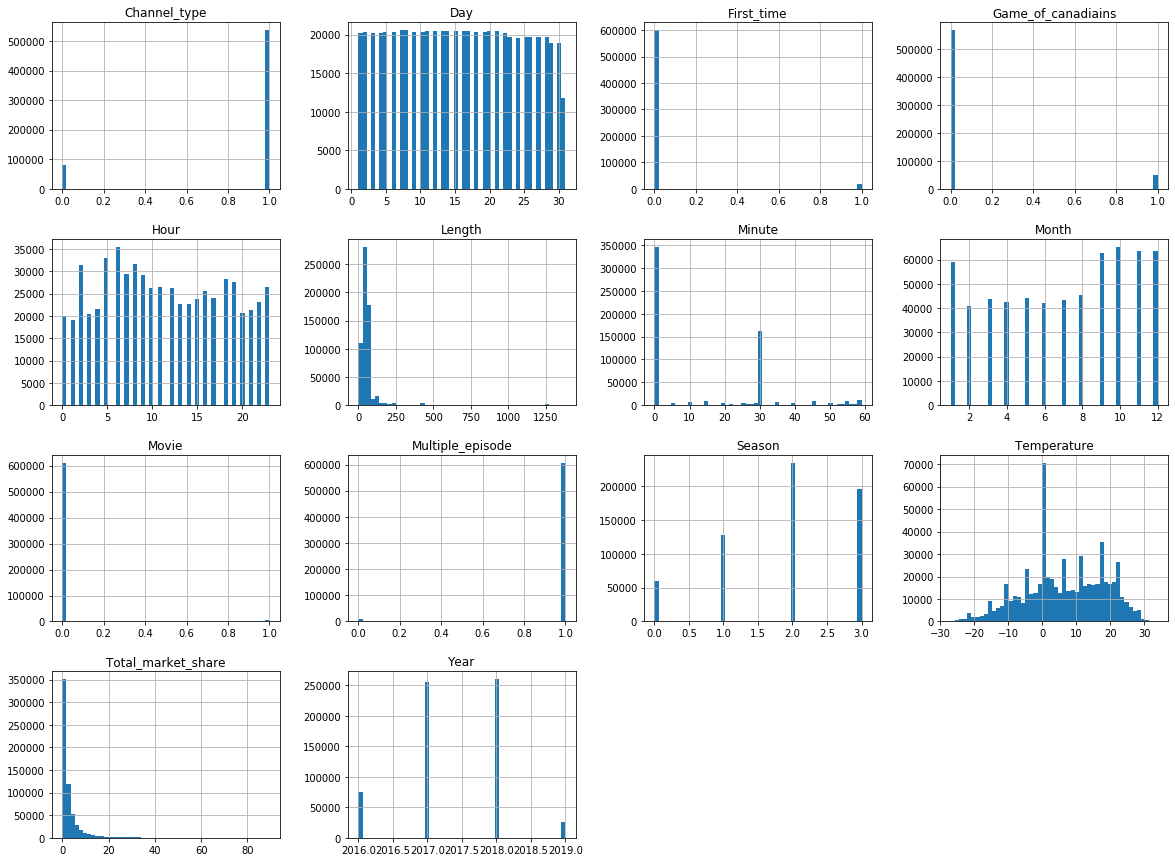

In [89]:
# Plotting numerical features

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [90]:
df.Length.describe()

count    616597.000000
mean         49.742671
std          79.189822
min           0.000000
25%          30.000000
50%          30.000000
75%          60.000000
max        1380.000000
Name: Length, dtype: float64

In [91]:
# df.to_csv('cleaned.csv')

In [92]:
# analyzing correlation coefficeints
corr_matrix = df.corr()
corr_matrix["Total_market_share"].sort_values(ascending=False)

Total_market_share    1.000000
Minute                0.097855
Multiple_episode      0.056569
Hour                  0.044933
Movie                 0.025719
Length                0.013337
Temperature           0.012695
Month                 0.006238
First_time            0.002354
Day                   0.002004
Season                0.001896
Game_of_canadiains   -0.004700
Year                 -0.019336
Channel_type         -0.572831
Name: Total_market_share, dtype: float64

## Dealing with Categorical Data

Most of the features in dataset is categorical. but ML algorithms and models are required to have numerical features.

But in dataset there is a problem. features like `Episode` are categorical with large number of **distinct**. So it is not practical to use methods like **One-hot or Ordinal Encoding**. 

We used **Feature Hashing** for converting categoricals to numerical.

In [93]:
df.reset_index(drop=True, inplace=True)
y = df['Total_market_share']
data = df.copy(deep=True)
data.drop(columns=['Total_market_share'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616597 entries, 0 to 616596
Data columns (total 18 columns):
Episode               616597 non-null object
Station               616597 non-null object
Channel_type          616597 non-null int64
Season                616597 non-null int64
Year                  616597 non-null int64
Weekday               616597 non-null object
Length                616597 non-null int32
Name_episode          616597 non-null object
Genre                 616597 non-null object
First_time            616597 non-null int64
Multiple_episode      616597 non-null int64
Movie                 616597 non-null int64
Game_of_canadiains    616597 non-null int64
Temperature           616597 non-null int32
Month                 616597 non-null int64
Day                   616597 non-null int64
Hour                  616597 non-null int64
Minute                616597 non-null int64
dtypes: int32(2), int64(11), object(5)
memory usage: 80.0+ MB


In [94]:
from sklearn.feature_extraction import FeatureHasher

def apply_hashing(feature, feature_len):
    column_names = []
    for i in range(feature_len): column_names.append(feature.name + "_" + str(i))
    
    h = FeatureHasher(n_features=feature_len, input_type="string")
    f = h.transform(feature)
    return pd.DataFrame(f.toarray(), columns=column_names)

In [95]:
hashed_episode = apply_hashing(data.Episode, 10)
hashed_name_episode = apply_hashing(data.Name_episode, 8)
hashed_station = apply_hashing(data.Station, 4)
hashed_genre = apply_hashing(data.Genre, 4)
hashed_weekday = apply_hashing(data.Weekday, 3) # Maybe better to use one-hot

data = pd.concat([data, hashed_episode, hashed_name_episode, hashed_station, hashed_genre, hashed_weekday], axis=1).drop(
    ['Name_episode', 'Episode', 'Station', 'Genre', 'Weekday'], axis=1)


In [96]:
data.head()

,Channel_type,Season,Year,Length,First_time,Multiple_episode,Movie,Game_of_canadiains,Temperature,Month,...,Station_1,Station_2,Station_3,Genre_0,Genre_1,Genre_2,Genre_3,Weekday_0,Weekday_1,Weekday_2
0,0,2,2016,120,0,1,0,0,20,8,...,-1.0,1.0,1.0,4.0,-5.0,0.0,2.0,-1.0,4.0,1.0
1,0,2,2016,30,0,1,0,0,19,8,...,-1.0,1.0,1.0,4.0,-2.0,6.0,9.0,-1.0,4.0,1.0
2,0,2,2016,30,0,1,0,0,19,8,...,-1.0,1.0,1.0,5.0,-2.0,4.0,9.0,-1.0,4.0,1.0
3,0,2,2016,60,0,1,0,0,18,8,...,-1.0,1.0,1.0,0.0,-1.0,0.0,-1.0,-1.0,4.0,1.0
4,0,2,2016,30,0,1,0,0,18,8,...,-1.0,1.0,1.0,3.0,1.0,2.0,0.0,-1.0,4.0,1.0


# Using a Regressor

At this level it is possible to use a regression model to create a predictor. 

I Used Scikit-learn library as mentioned bofore to apply models. 

Several models had tested. But the best model was `Random Forest`. 
However Scikit-learn Imp. of Random Forest is not time efficient when using `mae` as criterion. So I used `mse` for both metrics. 

Actully The result sounds good.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.30, random_state=42)

In [98]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(431617, 42) (431617,)
(184980, 42) (184980,)


In [99]:
# from sklearn import linear_model

# regr = linear_model.Lasso(alpha=0.1, random_state=42)
# regr.fit(X_train, y_train)

In [100]:
# from sklearn import linear_model

# regr = linear_model.SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.0,
#              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
#              learning_rate='invscaling', loss='epsilon_insensitive', max_iter=1000,
#              n_iter_no_change=30, penalty='l2', power_t=0.25, random_state=None,
#              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=5,
#              warm_start=False)

# regr.fit(X_train, y_train)


In [101]:
# from sklearn.tree import DecisionTreeRegressor

# regr = DecisionTreeRegressor(random_state=42, criterion='mae', max_depth=5, min_samples_leaf=3, max_features=6)
# regr.fit(X_train, y_train)

In [102]:
from sklearn.ensemble import RandomForestRegressor

# regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=12, max_features=None, max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=100, n_jobs=3, oob_score=False,
#                       random_state=42, verbose=5, warm_start=False)

regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=3, oob_score=False,
                      random_state=42, verbose=5, warm_start=False)

regr.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   23.2s


building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57

[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.2min


building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300building tree 83 of 300

building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
buildi

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.1min


building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300


[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  9.0min


building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  9.6min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=3, oob_score=False,
                      random_state=42, verbose=5, warm_start=False)

In [103]:
y_train_prd = regr.predict(X_train)
y_test_prd = regr.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    4.6s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:    8.2s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    8.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:    3.6s finished


In [104]:
from sklearn.metrics import r2_score

r2_score_train = r2_score(y_train, y_train_prd)
r2_score_test = r2_score(y_test, y_test_prd)

print('r2_score Train: ', r2_score_train)
print('r2_score Test: ', r2_score_test)
print('...................................')

r2_score Train:  0.9092008576792806
r2_score Test:  0.8829658964716518
...................................


In [105]:
from sklearn.metrics import mean_absolute_error

mae_score_train = mean_absolute_error(y_train, y_train_prd)
mae_score_test = mean_absolute_error(y_test, y_test_prd)

print('mae_score Train: ', mae_score_train)
print('mae_score Test: ', mae_score_test)

mae_score Train:  0.957420444083239
mae_score Test:  1.0489872446860178


After training the model and checking the metrics, We can simply save the model using `joblib` library

In [106]:
from joblib import dump, load
dump(regr, '../models/final_model.joblib') 

['models/final_model.joblib']